## Boston Gender with Python!!! and machine learning!!!


In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import math
import numpy as np
import csv
import numpy as np
import random
import scipy.stats as ss
import matplotlib.pyplot as plt



In [51]:
#from https://pypi.python.org/pypi/gender-guesser/0.4.0
#uses python 3 

import gender_guesser.detector as gender
d = gender.Detector()
print(d.get_gender(u"Bob"))

print(d.get_gender(u"Sally"))

print(d.get_gender(u"Pauley")) # should be androgynous
print(d.get_gender(u"Lopamudhra"))
print(d.get_gender(u"Shila"))


male
female
andy
unknown
female


In [52]:
#import the csv i downloaded from the website with the names -- could robotize this later..
# they have an API https://data.cityofboston.gov/Finance/Employee-Earnings-Report-2015/ah28-sywy
#pay_2016 = pd.read_csv("Employee_Earnings_Report_2016.csv")

#pay_2015 = pd.read_csv("Employee_Earnings_Report_2015.csv")
#pay_2014 = pd.read_csv("Employee_Earnings_Report_2014.csv")
#pay_2013 = pd.read_csv("boston_salary_raw_CSV/salary_2013.csv")

pay_2012 = pd.read_csv("boston_salary_raw_CSV/salary_2012.csv")



#pay_2016.head()

In [53]:
#pay_2016.info()
pay_2012.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21140 entries, 0 to 21139
Data columns (total 12 columns):
NAME              21140 non-null object
DEPARTMENT        21140 non-null object
TITLE             21140 non-null object
REGULAR           21140 non-null object
RETRO             21140 non-null object
OTHER             21140 non-null object
OVERTIME          21140 non-null object
INJURED           21140 non-null object
DETAIL            21140 non-null object
QUINN             21140 non-null object
TOTAL EARNINGS    21140 non-null object
ZIP               21140 non-null object
dtypes: object(12)
memory usage: 1.9+ MB


In [54]:
pay_2012.head(3)
#pay_2015.head(10)

NAME                  DEPARTMENT  \
0       Perch,Rhonda N.  Administration and Finance   
1       Harris,Sonya L.  Administration and Finance   
2  Gallagher,Anthony J.  Administration and Finance   

                       TITLE    REGULAR    RETRO     OTHER OVERTIME INJURED  \
0            Admin Secretary  $43646.22  $199.52  $1120.82    $0.00   $0.00   
1  Data Proc Systems Analyst  $72115.30    $0.00     $0.00    $0.00   $0.00   
2                  Exec Asst   $8828.56    $0.00     $0.00    $0.00   $0.00   

  DETAIL   QUINN TOTAL EARNINGS         ZIP  
0   $0.00  $0.00      $44966.56  02124-3735  
1   $0.00  $0.00      $72115.30  02124-3722  
2   $0.00  $0.00       $8828.56  02113-1172

what would I like to do now? for the graphic, I need to genderize, and then pick the top 100 people by pay.
the genderizer uses first name,so I need to make a column of first names..Ill start with the 2016 data set and aim to have this done soon to update my graphic...
...Ill have to experiment a bit with the genderizer so will pull out 20 names to test them..

In [55]:
#d_2016 = pay_2016 #copying the dataset to avoid changes
#d_2015 = pay_2015
d_2012 = pay_2012


#d_2016['regular'] = (d_2016['REGULAR'].replace( '[\$,)]','', regex=True ).astype(float))
#d_2016 = d_2016.rename(columns = {
#'REGULAR':"regular",
#"RETRO": "retro",})
                       
                       
#d_2016.head()
#d_2015.head()

In [56]:
d_2012.head(3)

NAME                  DEPARTMENT  \
0       Perch,Rhonda N.  Administration and Finance   
1       Harris,Sonya L.  Administration and Finance   
2  Gallagher,Anthony J.  Administration and Finance   

                       TITLE    REGULAR    RETRO     OTHER OVERTIME INJURED  \
0            Admin Secretary  $43646.22  $199.52  $1120.82    $0.00   $0.00   
1  Data Proc Systems Analyst  $72115.30    $0.00     $0.00    $0.00   $0.00   
2                  Exec Asst   $8828.56    $0.00     $0.00    $0.00   $0.00   

  DETAIL   QUINN TOTAL EARNINGS         ZIP  
0   $0.00  $0.00      $44966.56  02124-3735  
1   $0.00  $0.00      $72115.30  02124-3722  
2   $0.00  $0.00       $8828.56  02113-1172

In [57]:
#do I need to make sure other stuff is string?

d_2012['REGULAR'] = (d_2012['REGULAR'].replace( '[\$,)]','', regex=True ).astype(float)).round()
d_2012['RETRO'] = (d_2012['RETRO'].replace( '[\$,)]','', regex=True ).astype(float)).round()
d_2012['OTHER'] = (d_2012['OTHER'].replace( '[\$,)]','', regex=True ).astype(float)).round()
d_2012['OVERTIME'] = (d_2012['OVERTIME'].replace( '[\$,)]','', regex=True ).astype(float)).round()
d_2012['INJURED'] = (d_2012['INJURED'].replace( '[\$,)]','', regex=True ).astype(float)).round()
#in 2015 its detailS vs 2012,2016 detail 
#2013its just Quinn, not quinn/edu has in 2015 2016
d_2012['QUINN'] = (d_2012['QUINN'].replace( '[\$,)]','', regex=True ).astype(float)).round()
d_2012['TOTAL EARNINGS'] = (d_2012['TOTAL EARNINGS'].replace( '[\$,)]','', regex=True ).astype(float)).round()

In [58]:
#d_2012['DETAIL'] = (d_2012['DETAIL'].replace( '[\$,)]','', regex=True ).astype(float)).round()

#for whatever reason in 2012 detail wouldnt change , but i dont need it so leaving it

In [59]:
d_2012.head()

NAME                  DEPARTMENT  \
0       Perch,Rhonda N.  Administration and Finance   
1       Harris,Sonya L.  Administration and Finance   
2  Gallagher,Anthony J.  Administration and Finance   
3        Natoli,John F.  Administration and Finance   
4     Quirk,Devin Lyons  Administration and Finance   

                       TITLE   REGULAR  RETRO   OTHER  OVERTIME  INJURED  \
0            Admin Secretary   43646.0  200.0  1121.0       0.0      0.0   
1  Data Proc Systems Analyst   72115.0    0.0     0.0       0.0      0.0   
2                  Exec Asst    8829.0    0.0     0.0       0.0      0.0   
3         Exec Asst   (Obpe)  100487.0    0.0     0.0       0.0      0.0   
4         Exec Asst   (Obpe)   84853.0    0.0  1629.0       0.0      0.0   

  DETAIL   QUINN  TOTAL EARNINGS         ZIP  
0   $0.00    0.0         44967.0  02124-3735  
1   $0.00    0.0         72115.0  02124-3722  
2   $0.00    0.0          8829.0  02113-1172  
3   $0.00    0.0        100487.0  02108-3407  
4   $0.00    0.0         86483.0  02129-3728

In [60]:


d_2012 = d_2012.rename(columns = {
'REGULAR':"salary",
'RETRO':"retroactive",
'OTHER':'other',
'OVERTIME':'overtime',
'DETAIL':'detail',
'INJURED':'injured',
'QUINN':'quinn',
'TOTAL EARNINGS':'totalSalary',
'NAME':'name',
"DEPARTMENT" : "dept",
"TITLE" : "title",
"ZIP" : "zip_code",
    
    
})
d_2012.head()


#the csv used for d3(v3) jsI want to update has this: columns are name, 
#firstName, dept, salary, totalSalary(still has $), gender -- is just F or M 

name                        dept  \
0       Perch,Rhonda N.  Administration and Finance   
1       Harris,Sonya L.  Administration and Finance   
2  Gallagher,Anthony J.  Administration and Finance   
3        Natoli,John F.  Administration and Finance   
4     Quirk,Devin Lyons  Administration and Finance   

                       title    salary  retroactive   other  overtime  \
0            Admin Secretary   43646.0        200.0  1121.0       0.0   
1  Data Proc Systems Analyst   72115.0          0.0     0.0       0.0   
2                  Exec Asst    8829.0          0.0     0.0       0.0   
3         Exec Asst   (Obpe)  100487.0          0.0     0.0       0.0   
4         Exec Asst   (Obpe)   84853.0          0.0  1629.0       0.0   

   injured DETAIL   quinn  totalSalary    zip_code  
0      0.0   $0.00    0.0      44967.0  02124-3735  
1      0.0   $0.00    0.0      72115.0  02124-3722  
2      0.0   $0.00    0.0       8829.0  02113-1172  
3      0.0   $0.00    0.0     100487.0  02108-3407  
4      0.0   $0.00    0.0      86483.0  02129-3728

Round salaries to nearest dollar


In [61]:
import math
h = int(round(4.2))
h

4

### I ll split on the names
and now can see that there are some middle names 
so I'm going to use Regex to clean a bit..
if there is a Capitalized letter with nothing after, or a capitalized letter with a period, I want to split it, but otherwise Ill keep the two names, don't know how genderizer will handle them but well see..


had to do the splitting off of first name in two steps that probably should be one so can review later..below might help

#see this
#https://stackoverflow.com/questions/29585106/pandas-how-to-split-twice-a-given-field
 #try this:
trimmed_list = [i.replace('.', ',').split(',') for i in sbj[0].tolist() if i != ""]
item_list = [item.strip(whitespace) for item in itertools.chain(*trimmed_list)]
item_count = Counter(item_list)


In [62]:
firstName = d_2012.name.apply(lambda x: x.split(',')[1])
y = [name.split(" ")[0] for name in firstName]
y
#[]f_name.apply(lambda x: x.split(',')[1])
#first_name

#name_split = [name.split(',') for name in names]
#newlist = []
#for name in name_split:
 #   first = name[1]
  #  newlist.append(first)
#y = []
#for name in f_name:
 #   x = name.split(" ")
  #  y.append(x[0])
#print(y)




['Rhonda',
 'Sonya',
 'Anthony',
 'John',
 'Devin',
 'Elaine',
 'Rebecca',
 'Edna',
 'Alda',
 'Christopher',
 'Brendan',
 'Garry',
 'Stephanie',
 'Jonathan',
 'Ryland',
 'William',
 'Frank',
 'Emmanuel',
 'Jamie',
 'Alylin',
 'Joseph',
 'Karin',
 'Arreen',
 'Benjamin',
 'Melodi',
 'Eileen',
 'Patricia',
 'Linda',
 'John',
 'Niall',
 'Louis',
 'Joyce',
 'Ryan',
 'Heidi',
 'Catherine',
 'Ann',
 'Amy',
 'Anthony',
 'Joann',
 'Diane',
 'Jane',
 'Winnie',
 'Wendolyn',
 'Liam',
 'Alysha',
 'William',
 'Ronak',
 'Alexander',
 'Daniel',
 'Nina',
 'Louise',
 'Xing-Bing',
 'Jennifer',
 'John',
 'Teresia',
 'Lisa',
 'Jennifer',
 'Sheila',
 'Leah',
 'Brenna',
 'Kasey',
 'Arthenis',
 'Barbara',
 'Eugene',
 'Shawnte',
 'Kathyria',
 'Alexandra',
 'Ann',
 'Patricia',
 'Katherine',
 'Carla',
 'Lucia',
 'Carol',
 'Donald',
 'Kathleen',
 'Patricia',
 'Brian',
 'Dana',
 'Jennifer',
 'Darius',
 'Carolyn',
 'Winnie',
 'Linda',
 'Roger',
 'Willie',
 'Frank',
 'Jacqueline',
 'Ramona',
 'Maryellen',
 'Vivian',

create a column called first name, last name and one called gender

In [63]:
firstName = d_2012.name.apply(lambda x: x.split(',')[1])
y = [name.split(" ")[0] for name in firstName]


import gender_guesser.detector as gender
d = gender.Detector()

gender = []

for name in y:
    gender_it = d.get_gender(name)
    gender.append(gender_it)

d_2012["firstName"] = y
d_2012["gender"] = gender

Do the whole data set, create a column of first name and a column of gender, i need to make it match eventually
what I used in my D3 csv to avoid hassle when recreating the graphic

In [64]:

d_2012.head()

name                        dept  \
0       Perch,Rhonda N.  Administration and Finance   
1       Harris,Sonya L.  Administration and Finance   
2  Gallagher,Anthony J.  Administration and Finance   
3        Natoli,John F.  Administration and Finance   
4     Quirk,Devin Lyons  Administration and Finance   

                       title    salary  retroactive   other  overtime  \
0            Admin Secretary   43646.0        200.0  1121.0       0.0   
1  Data Proc Systems Analyst   72115.0          0.0     0.0       0.0   
2                  Exec Asst    8829.0          0.0     0.0       0.0   
3         Exec Asst   (Obpe)  100487.0          0.0     0.0       0.0   
4         Exec Asst   (Obpe)   84853.0          0.0  1629.0       0.0   

   injured DETAIL   quinn  totalSalary    zip_code firstName       gender  
0      0.0   $0.00    0.0      44967.0  02124-3735    Rhonda       female  
1      0.0   $0.00    0.0      72115.0  02124-3722     Sonya       female  
2      0.0   $0.00    0.0       8829.0  02113-1172   Anthony         male  
3      0.0   $0.00    0.0     100487.0  02108-3407      John         male  
4      0.0   $0.00    0.0      86483.0  02129-3728     Devin  mostly_male

In [65]:
lastName = d_2012.name.apply(lambda x: x.split(',')[0])
#y = [name.split(" ")[0] for name in firstName]
#y
lastName.head()

0        Perch
1       Harris
2    Gallagher
3       Natoli
4        Quirk
Name: name, dtype: object

In [66]:

d_2012["lastName"] = lastName
d_2012.head()

name                        dept  \
0       Perch,Rhonda N.  Administration and Finance   
1       Harris,Sonya L.  Administration and Finance   
2  Gallagher,Anthony J.  Administration and Finance   
3        Natoli,John F.  Administration and Finance   
4     Quirk,Devin Lyons  Administration and Finance   

                       title    salary  retroactive   other  overtime  \
0            Admin Secretary   43646.0        200.0  1121.0       0.0   
1  Data Proc Systems Analyst   72115.0          0.0     0.0       0.0   
2                  Exec Asst    8829.0          0.0     0.0       0.0   
3         Exec Asst   (Obpe)  100487.0          0.0     0.0       0.0   
4         Exec Asst   (Obpe)   84853.0          0.0  1629.0       0.0   

   injured DETAIL   quinn  totalSalary    zip_code firstName       gender  \
0      0.0   $0.00    0.0      44967.0  02124-3735    Rhonda       female   
1      0.0   $0.00    0.0      72115.0  02124-3722     Sonya       female   
2      0.0   $0.00    0.0       8829.0  02113-1172   Anthony         male   
3      0.0   $0.00    0.0     100487.0  02108-3407      John         male   
4      0.0   $0.00    0.0      86483.0  02129-3728     Devin  mostly_male   

    lastName  
0      Perch  
1     Harris  
2  Gallagher  
3     Natoli  
4      Quirk

In [67]:
d_2012.isnull().sum()

name           0
dept           0
title          0
salary         0
retroactive    0
other          0
overtime       0
injured        0
DETAIL         0
quinn          0
totalSalary    0
zip_code       0
firstName      0
gender         0
lastName       0
dtype: int64

In [68]:

d_2012["fullName"] = d_2012["firstName"] + " " + d_2012["lastName"]
#dataframe["period"] = dataframe["Year"].map(str) + dataframe["quarter"]
d_2012.head()

name                        dept  \
0       Perch,Rhonda N.  Administration and Finance   
1       Harris,Sonya L.  Administration and Finance   
2  Gallagher,Anthony J.  Administration and Finance   
3        Natoli,John F.  Administration and Finance   
4     Quirk,Devin Lyons  Administration and Finance   

                       title    salary  retroactive   other  overtime  \
0            Admin Secretary   43646.0        200.0  1121.0       0.0   
1  Data Proc Systems Analyst   72115.0          0.0     0.0       0.0   
2                  Exec Asst    8829.0          0.0     0.0       0.0   
3         Exec Asst   (Obpe)  100487.0          0.0     0.0       0.0   
4         Exec Asst   (Obpe)   84853.0          0.0  1629.0       0.0   

   injured DETAIL   quinn  totalSalary    zip_code firstName       gender  \
0      0.0   $0.00    0.0      44967.0  02124-3735    Rhonda       female   
1      0.0   $0.00    0.0      72115.0  02124-3722     Sonya       female   
2      0.0   $0.00    0.0       8829.0  02113-1172   Anthony         male   
3      0.0   $0.00    0.0     100487.0  02108-3407      John         male   
4      0.0   $0.00    0.0      86483.0  02129-3728     Devin  mostly_male   

    lastName           fullName  
0      Perch       Rhonda Perch  
1     Harris       Sonya Harris  
2  Gallagher  Anthony Gallagher  
3     Natoli        John Natoli  
4      Quirk        Devin Quirk

change the order of the columns


In [69]:
cols = list(d_2012.columns.values)
cols

['name',
 'dept',
 'title',
 'salary',
 'retroactive',
 'other',
 'overtime',
 'injured',
 'DETAIL ',
 'quinn',
 'totalSalary',
 'zip_code',
 'firstName',
 'gender',
 'lastName',
 'fullName']

In [70]:
#reorder columns a bit
d_2012 = d_2012[[

    'fullName',
 'gender',
     'name',
'firstName',
    'lastName',
 'salary',
'totalSalary',
'dept',
 'title',
 'retroactive',
 'other',
 'overtime',
 'injured',
 #'detail', 2012 nope
 'quinn',
 'zip_code', 
 ]]
d_2012.head()

fullName       gender                  name firstName   lastName  \
0       Rhonda Perch       female       Perch,Rhonda N.    Rhonda      Perch   
1       Sonya Harris       female       Harris,Sonya L.     Sonya     Harris   
2  Anthony Gallagher         male  Gallagher,Anthony J.   Anthony  Gallagher   
3        John Natoli         male        Natoli,John F.      John     Natoli   
4        Devin Quirk  mostly_male     Quirk,Devin Lyons     Devin      Quirk   

     salary  totalSalary                        dept  \
0   43646.0      44967.0  Administration and Finance   
1   72115.0      72115.0  Administration and Finance   
2    8829.0       8829.0  Administration and Finance   
3  100487.0     100487.0  Administration and Finance   
4   84853.0      86483.0  Administration and Finance   

                       title  retroactive   other  overtime  injured  quinn  \
0            Admin Secretary        200.0  1121.0       0.0      0.0    0.0   
1  Data Proc Systems Analyst          0.0     0.0       0.0      0.0    0.0   
2                  Exec Asst          0.0     0.0       0.0      0.0    0.0   
3         Exec Asst   (Obpe)          0.0     0.0       0.0      0.0    0.0   
4         Exec Asst   (Obpe)          0.0  1629.0       0.0      0.0    0.0   

     zip_code  
0  02124-3735  
1  02124-3722  
2  02113-1172  
3  02108-3407  
4  02129-3728

messing about with the name split 

name_split = [name.split(',') for name in names]
newlist = []
for name in name_split:
    first = name[1]
    newlist.append(first)
y = []
for name in newlist:
    x = name.split(" ")
    y.append(x[0])

#add y as a column in the data set

d_2016["first_names"] = y
d_2016.head()


messing about

import gender_guesser.detector as gender
d = gender.Detector()

gender = []

for name in y:
    gender_it = d.get_gender(name)
    gender.append(gender_it)
d_2016["gender"] = gender
d_2016.head()

shortdf = d_2016[["NAME","first_names","gender","REGULAR"]] #I can add stuff here later and rerun for my csv, ie department
print(shortdf.sort_values(by=['gender'],ascending=True))

now I'd like to see how many there are of each type in the new gender column...

In [71]:
d_2012['gender'].value_counts() #andy is androgynous

female           9077
male             8865
unknown          1800
mostly_female     944
mostly_male       304
andy              150
Name: gender, dtype: int64

df.loc[df['First Season'] > 1990, 'First Season'] = 1

In [72]:
d_2012.loc[d_2012['gender'] == "mostly_female", "gender"] = "female"
d_2012.loc[d_2012['gender'] == "mostly_male", "gender"] = "male"
d_2012['gender'].value_counts() #andy is androgynous

female     10021
male        9169
unknown     1800
andy         150
Name: gender, dtype: int64

I'm going to group mostly's into their respective groups

im going to sort by top 100 earners to see how many of those have different value counts since
that's what I use in my chart


these two women are listed as unknowns, since I looked them up im going to fix in the data set..
13129          McCreary,Makeeba   Makeeba                 Communications   
6050   Edouard-Vincent,Marice M    Marice  Asst Superintendent-Network A 

In [73]:
d_2012.loc[d_2012['name'] == "McCreary,Makeeba", "gender"] = "female"
d_2012.loc[d_2012['name'] == "Edouard-Vincent,Marice M", "gender"] = "female"
d_2012.loc[d_2012['name'] == "Chavda,Kamalkant A", "gender"] = "male"
d_2012.loc[d_2012['fullName'] == "Queon Jackson", "gender"] = "male"


#Chavda,Kamalkant A
#Queon, Jackson
d_2012['gender'].value_counts()

female     10022
male        9171
unknown     1797
andy         150
Name: gender, dtype: int64

In [74]:
unknowns = d_2012[(d_2012['gender']== "unknown")]
#MM = shortForCsv[(shortForCsv['gender']== "mostly_male")]
#MF = shortForCsv[(shortForCsv['gender']== "mostly_female")]
print(unknowns) 
#since its a fairly short list Im going to look them up on the intraweb but this is something I should automate or skip those 
#names, or make my own additional filter using social security names?
#i Can also add the ones Ive checked to these lists so they are 

                     fullName   gender                        name  \
14                Ryland Hall  unknown                 Hall,Ryland   
19               Alylin Unsal  unknown                Unsal,Alylin   
22              Arreen Andrew  unknown               Andrew,Arreen   
24              Melodi Greene  unknown               Greene,Melodi   
42     Wendolyn Castillo-Cook  unknown   Castillo-Cook,Wendolyn M.   
51              Xing-Bing Gee  unknown               Gee,Xing-Bing   
61             Arthenis Sneed  unknown              Sneed,Arthenis   
64           Shawnte Hitchens  unknown     Hitchens,Shawnte Nicole   
65             Kathyria Ortiz  unknown              Ortiz,Kathyria   
143            Geneen Bartley  unknown           Bartley,Geneen K.   
179               Listra Paul  unknown                 Paul,Listra   
189               Edem Essien  unknown                 Essien,Edem   
218          Arlande St Louis  unknown  St Louis,Arlande Alexandra   
240              Kid

In [75]:
d_2012.dtypes


fullName        object
gender          object
name            object
firstName       object
lastName        object
salary         float64
totalSalary    float64
dept            object
title           object
retroactive    float64
other          float64
overtime       float64
injured        float64
quinn          float64
zip_code        object
dtype: object

In [76]:
print(d_2012.shape)
d_2012.columns


(21140, 15)


Index(['fullName', 'gender', 'name', 'firstName', 'lastName', 'salary',
       'totalSalary', 'dept', 'title', 'retroactive', 'other', 'overtime',
       'injured', 'quinn', 'zip_code'],
      dtype='object')

In [77]:
d_2012.head()

fullName  gender                  name firstName   lastName  \
0       Rhonda Perch  female       Perch,Rhonda N.    Rhonda      Perch   
1       Sonya Harris  female       Harris,Sonya L.     Sonya     Harris   
2  Anthony Gallagher    male  Gallagher,Anthony J.   Anthony  Gallagher   
3        John Natoli    male        Natoli,John F.      John     Natoli   
4        Devin Quirk    male     Quirk,Devin Lyons     Devin      Quirk   

     salary  totalSalary                        dept  \
0   43646.0      44967.0  Administration and Finance   
1   72115.0      72115.0  Administration and Finance   
2    8829.0       8829.0  Administration and Finance   
3  100487.0     100487.0  Administration and Finance   
4   84853.0      86483.0  Administration and Finance   

                       title  retroactive   other  overtime  injured  quinn  \
0            Admin Secretary        200.0  1121.0       0.0      0.0    0.0   
1  Data Proc Systems Analyst          0.0     0.0       0.0      0.0    0.0   
2                  Exec Asst          0.0     0.0       0.0      0.0    0.0   
3         Exec Asst   (Obpe)          0.0     0.0       0.0      0.0    0.0   
4         Exec Asst   (Obpe)          0.0  1629.0       0.0      0.0    0.0   

     zip_code  
0  02124-3735  
1  02124-3722  
2  02113-1172  
3  02108-3407  
4  02129-3728

In [78]:
#Get a sense of how many missing values there are in the dataframe.
print(np.sum([d_2012.salary.isnull()]))
np.sum([d_2012.gender.isnull()])

0


0

In [79]:
salarySorted = d_2012.sort_values(by='salary', ascending=False)
salarySorted.head()



fullName  gender                   name    firstName   lastName  \
8886     Carol Johnson  female        Johnson,Carol R        Carol    Johnson   
5500  Bartholomew Shea    male     Shea,Bartholomew J  Bartholomew       Shea   
8977    John McDonough    male       McDonough,John P         John  McDonough   
4633    Gerard Fontana    male      Fontana,Gerard T.       Gerard    Fontana   
4710     David Granara    male  Granara,David Richard        David    Granara   

        salary  totalSalary                    dept  \
8886  266750.0     323722.0   Boston Public Schools   
5500  181156.0     197998.0  Boston Fire Department   
8977  177188.0     180518.0   Boston Public Schools   
4633  175697.0     205925.0  Boston Fire Department   
4710  175428.0     189305.0  Boston Fire Department   

                              title  retroactive    other  overtime  injured  \
8886                 Superintendent          0.0  56972.0       0.0      0.0   
5500  Dep Fire Chief Administration          0.0   9526.0    7316.0      0.0   
8977        Chief Financial Officer          0.0   3330.0       0.0      0.0   
4633  Dep Fire Chief Administration          0.0  13345.0   16883.0      0.0   
4710  Dep Fire Chief Administration          0.0  10456.0    3422.0      0.0   

      quinn    zip_code  
8886    0.0  02129-4233  
5500    0.0  02132-1863  
8977    0.0  02130-3451  
4633    0.0  02169-2417  
4710    0.0  02128-1084

In [80]:
#need to fix the 2014 department names to match the d3 names and also format the full names since writtenbadly for tooltip use
#new_names = {'DEPARTMENT NAME':'dept'}
#salarySorted = salarySorted.rename(index=str, columns=new_names)


In [81]:
#create a new name column for better tool tip use by joining firstName and lastName columns into one


so i have what i need above to export to csv and update my graph...START HERE
-- after updating, play with bokeh here? do a new sheet to update FBI crime project?

the csv used for d3(v3) jsI want to update has this: columns are name, firstName, dept, salary, totalSalary(still has $), gender -- is just F or M 
so make a truncated version of the csv
name in this style to be like existing csv:
a_data_boston_2014_employee_top_100

In [82]:
#make csv with just the earlier data columns ie 6 of them newdf = df[(df['column_one']>2004) & (df['column_two']==9)]
#AND JUST PICK THE TOP 100 
shortForCsv = salarySorted[["fullName", "firstName", "name", "gender","salary", "totalSalary","dept"]].head(100)
#df1 = df[['a','b']]
#df1 = df.ix[:,0:2]
#shortForCsv['gender'].value_counts()



In [83]:
salarySorted

fullName   gender                       name  \
8886               Carol Johnson   female            Johnson,Carol R   
5500            Bartholomew Shea     male         Shea,Bartholomew J   
8977              John McDonough     male           McDonough,John P   
4633              Gerard Fontana     male          Fontana,Gerard T.   
4710               David Granara     male      Granara,David Richard   
1259                    Amy Ryan   female                 Ryan,Amy E   
2209               Thomas Menino     male           Menino,Thomas M.   
4648         Roderick Fraser Jr.     male      Fraser Jr.,Roderick J   
6367                Edward Davis     male             Davis,Edward F   
4381                John Coppney     male            Coppney,John T.   
4774                 John Hasson     male                Hasson,John   
5116             Daniel McDevitt     male          McDevitt,Daniel J   
5620               Bernard Tully     male           Tully,Bernard J.   
7352              Daniel Linskey     male           Linskey,Daniel P   
9128                  Linda Chen   female              Chen,Linda P.   
5305              John O'Donnell     male          O'Donnell,John K.   
4078               Steve Abraira     male       Abraira,Steve Edward   
4606              Joseph Fleming     male     Fleming,Joseph Michael   
4537           Robert Dunderdale     male          Dunderdale,Robert   
4587                 Joseph Finn     male             Finn,Joseph E.   
4475         Richard DiBenedetto     male   DiBenedetto,Richard John   
4536              Stephen Dunbar     male           Dunbar,Stephen K   
4789              John Henderson     male             Henderson,John   
4831           Curtis Holzendorf     male          Holzendorf,Curtis   
4257                  Paul Burke     male               Burke,Paul T   
5303             Brian O'Donnell     male         O'Donnell,Brian C.   
4892                David Joseph     male             Joseph,David W   
1677               William Oates     male              Oates,William   
6647             Paul Fitzgerald     male          Fitzgerald,Paul A   
6695                Kenneth Fong     male               Fong,Kenneth   
...                          ...      ...                        ...   
6859            Christina Greene   female           Greene,Christina   
7263             Shannon LaBarre   female          LaBarre,Shannon M   
7287   Stephanie Langford-Harris   female  Langford-Harris,Stephanie   
18638             Francine Mills   female             Mills,Francine   
7336             Stanley Leonard     male          Leonard,Stanley J   
273                  Ruth Agosto   female                Agosto,Ruth   
18700              Christina Yee   female            Yee,Christina C   
18698                Souyan Wong  unknown                Wong,Souyan   
2024            Patricia Manning   female           Manning,Patricia   
16244              John Licorish     male           Licorish,John S.   
7728           Francis Morrissey     male          Morrissey,Francis   
18684               Liana Tuller   female             Tuller,Liana R   
7615             Brian McMasters     male          McMasters,Brian M   
16310             Nancy Brockman   female             Brockman,Nancy   
10226                 Paula Rodi   female               Rodi,Paula S   
2053            Charles Trainito     male         Trainito,Charles D   
16316              Eileen Carter   female            Carter,Eileen P   
7507                  Beya Masso  unknown                 Masso,Beya   
7481               Shawn Marando     male            Marando,Shawn P   
7479             Peter Mansfield     male            Mansfield,Peter   
7454              Michelle Maher   female             Maher,Michelle   
2100                 Nancy Daley   female                Daley,Nancy   
2103               Yvens Germain  unknown              Germain,Yvens   
7391                  Kerri Lutz   female            Lutz,Kerri 

bring the csv formula lower later..

I havent done anything about the gender groups yet, I need to make them into M or F and get rid of or 
check the unknowns and mostly's...'

In [84]:
shortForCsv['gender'].value_counts()

male      87
female    13
Name: gender, dtype: int64

In [85]:
mostly_female = shortForCsv[(shortForCsv['gender']== "mostly_female")]
print(mostly_female)
# carol johnson woman

Empty DataFrame
Columns: [fullName, firstName, name, gender, salary, totalSalary, dept]
Index: []


McCreary - F
https://www.bostonpublicschools.org/site/default.aspx?PageType=3&ModuleInstanceID=9715&ViewID=7b97f7ed-8e5e-4120-848f-a8b4987d588f&RenderLoc=0&FlexDataID=7541&PageID=4853

 Edouard-Vincent,Marice - F
https://twitter.com/netsuptb?lang=en

McGovern,Ryan J -- M
http://www.firehouse.com/news/11252963/after-falling-through-floor-boston-firefighter-thankful-for-minor-injuries

Franklin-Hodge,Jascha -- M
https://www.boston.gov/departments/innovation-and-technology/jascha-franklin-hodge

  Nee,Kelly A  -- F
https://www.youtube.com/watch?v=2x7OrSKi_04

 Driscoll,Mary E      Mary  Asst Superintendent-Network A - F
 https://www.bc.edu/schools/csom/lynchacademy/alumni/2012/Driscoll.html
 
  Hung,Kelly M     Kelly  Asst Superintendent-Network A  153503.93 -- F
  
  https://www.bc.edu/schools/csom/lynchacademy/alumni/2014/KHung.html
  
  Chavda,Kamalkant A
  
  http://picssr.com/photos/bostonfoundation/interesting/page2?nsid=64189140@N04
  
  Queon, Jackson - male
  https://www.bostonglobe.com/metro/2016/08/05/paid-leave-dragged-years-former-boston-headmaster-collected/E5kOej6eS7LOeBC40IVkfO/story.html
  
  Meredith Weenick woman
  https://www.cityofboston.gov/oldnews/Default.aspx?id=8598
  
  Kelly Nee woman
  https://www.bu.edu/today/2017/bupd-chief-kelly-nee/
  
  Kimberly Rice
  https://twitter.com/kimberlyarice?lang=en

NEED TO FIX THE WEB LINK ON THE CHARTS PAGE TO GO TO 2016

I could look up the mostly and unknowns to confirm their gender -- its just 7 peeps

In [86]:
shortForCsv.head()

fullName    firstName                   name  gender    salary  \
8886     Carol Johnson        Carol        Johnson,Carol R  female  266750.0   
5500  Bartholomew Shea  Bartholomew     Shea,Bartholomew J    male  181156.0   
8977    John McDonough         John       McDonough,John P    male  177188.0   
4633    Gerard Fontana       Gerard      Fontana,Gerard T.    male  175697.0   
4710     David Granara        David  Granara,David Richard    male  175428.0   

      totalSalary                    dept  
8886     323722.0   Boston Public Schools  
5500     197998.0  Boston Fire Department  
8977     180518.0   Boston Public Schools  
4633     205925.0  Boston Fire Department  
4710     189305.0  Boston Fire Department

it would be nice to add additioal charts to that page, like for 2016 are the highest paid workers in 
each dept male or female? not sure how to make a simple graph like that, dot matrix?

it seems like tommy chang is top earner but comes up as superintendent, rather than school system. going to take a look at how they label departments in the larger data set..

In [87]:
print(shortForCsv["gender"].value_counts()) 
d_2012['gender'].value_counts() 


male      87
female    13
Name: gender, dtype: int64


female     10022
male        9171
unknown     1797
andy         150
Name: gender, dtype: int64

I'm going to group the schools for the top 100 under Boston Public Schools

In [88]:
#test = shortForCsv[(shortForCsv['dept']== "Fam & Student Engagemt")]
#test1 = shortForCsv[(shortForCsv['dept']== "Achievement Gap")]
test2 = shortForCsv[(shortForCsv['dept']== "Dpt of Innovation & Technology")]

test2


fullName firstName           name gender    salary  totalSalary  \
1677  William Oates   William  Oates,William   male  154875.0     154875.0   

                                dept  
1677  Dpt of Innovation & Technology

In [89]:
shortForCsv.loc[shortForCsv['dept'] == "Asst Superintendent-Network A", "dept"] = "Boston Public Schools"
shortForCsv.loc[shortForCsv['dept'] == "BPS Special Education", "dept"] = "Boston Public Schools"
shortForCsv.loc[shortForCsv['dept'] == "Fam & Student Engagemt", "dept"] = "Boston Public Schools"
shortForCsv.loc[shortForCsv['dept'] == "Achievement Gap", "dept"] = "Boston Public Schools"
shortForCsv.loc[shortForCsv['dept'] == "Kennedy, EM Health Academy", "dept"] = "Boston Public Schools"
shortForCsv.loc[shortForCsv['dept'] == "BPS Human Resource Team", "dept"] = "Boston Public Schools"
shortForCsv.loc[shortForCsv['dept'] == "Superintendent", "dept"] = "Boston Public Schools"
shortForCsv.loc[shortForCsv['dept'] == "Asst Superintendent-Network G", "dept"] = "Boston Public Schools"
shortForCsv.loc[shortForCsv['dept'] == "Asst Superintendent-Network B", "dept"] = "Boston Public Schools"
shortForCsv.loc[shortForCsv['dept'] == "BPS Boston Latin", "dept"] = "Boston Public Schools"
shortForCsv.loc[shortForCsv['dept'] == "Asst Superintendent-Network E", "dept"] = "Boston Public Schools"
shortForCsv.loc[shortForCsv['dept'] == "Asst Superintendent-Network F", "dept"] = "Boston Public Schools"
shortForCsv.loc[shortForCsv['dept'] == "Asst Superintendent-Network D", "dept"] = "Boston Public Schools"
shortForCsv.loc[shortForCsv['dept'] == "BPS Equity", "dept"] = "Boston Public Schools"
shortForCsv.loc[shortForCsv['dept'] == "BPS English High", "dept"] = "Boston Public Schools"
shortForCsv.loc[shortForCsv['dept'] == "BPS Murphy Elementary", "dept"] = "Boston Public Schools"
shortForCsv.loc[shortForCsv['dept'] == "BPS Brighton High", "dept"] = "Boston Public Schools"
shortForCsv.loc[shortForCsv['dept'] == "Law Department", "dept"] = "Law"
shortForCsv.loc[shortForCsv['dept'] == "Dpt of Innovation & Technology", "dept"] = "Innovation & Technology"






#put school chief chang in new school dept group not needed
#shortForCsv.loc[shortForCsv['name'] == "Chang,Tommy", "dept"] = "Boston Public Schools"
#shortForCsv.loc[shortForCsv['name'] == "Chavda,Kamalkant A", "gender"] = "male"




shortForCsv["dept"].value_counts()

Boston Fire Department        59
Boston Police Department      18
Boston Public Schools         13
Mayor's Office                 3
Law                            2
Property Management            1
Boston Public Library          1
Innovation & Technology        1
Assessing Department           1
Treasury-Treasury Division     1
Name: dept, dtype: int64

In [90]:
shortForCsv['gender'].value_counts()

male      87
female    13
Name: gender, dtype: int64

In [91]:
b = d_2012[(d_2012['dept']== "Superintendent")]
b
#could check to see if all these people are in BPS to change the category overall..

Empty DataFrame
Columns: [fullName, gender, name, firstName, lastName, salary, totalSalary, dept, title, retroactive, other, overtime, injured, quinn, zip_code]
Index: []

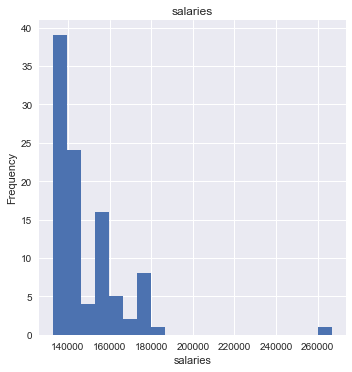

In [92]:
#Generate histograms using the format df.YOUR_CHOICE_OF_COLUMN_NAME.hist(bins=YOUR_CHOICE_OF_BIN_SIZE)

shortForCsv.salary.hist(bins=20)
plt.xlabel('salaries')
plt.ylabel('Frequency')
plt.title('salaries');

plt.show();



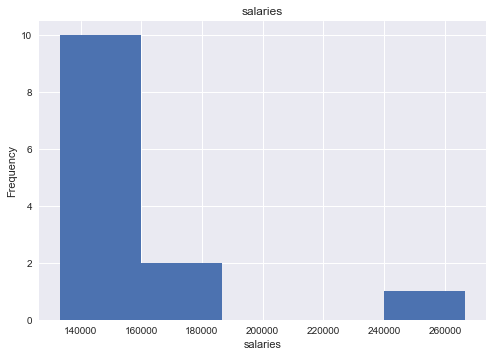

In [93]:

shortForCsv[shortForCsv.gender == "female"].salary.hist(bins=5)
plt.xlabel('salaries')
plt.ylabel('Frequency')
plt.title('salaries');

plt.show();




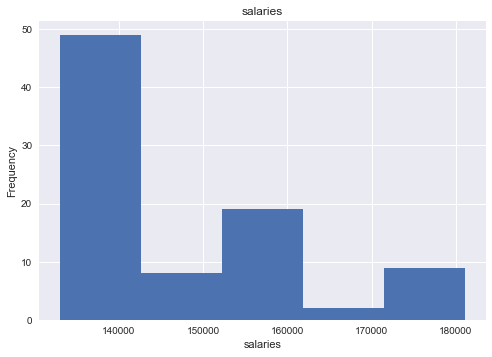

In [94]:
shortForCsv[shortForCsv.gender == "male"].salary.hist(bins=5)
plt.xlabel('salaries')
plt.ylabel('Frequency')
plt.title('salaries');

plt.show();





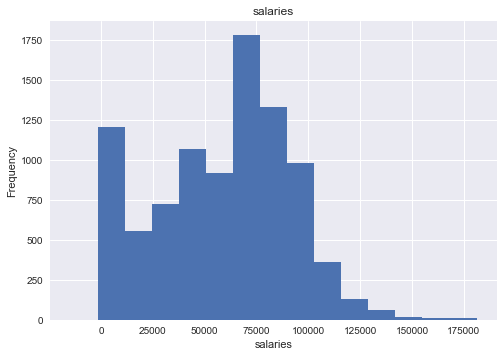

In [95]:
#d_2015
d_2012[d_2012.gender == "male"].salary.hist(bins=15)
plt.xlabel('salaries')
plt.ylabel('Frequency')
plt.title('salaries');

plt.show();





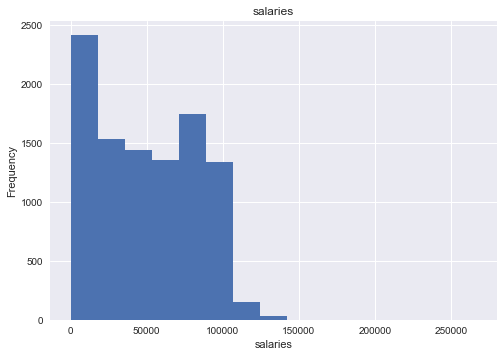

In [96]:
#d_2015
d_2012[d_2012.gender == "female"].salary.hist(bins=15)
plt.xlabel('salaries')
plt.ylabel('Frequency')
plt.title('salaries');

plt.show();





In [97]:
shortForCsv.to_csv("top100_2012", index=False)

In [98]:
import seaborn as sns
#x = shortForCsv["dept"]
#y = shortForCsv["gender"]
sns.lmplot("dept", "gender", data=shortForCsv, fit_reg=False)
#ax = sns.stripplot(x=shortForCsv["dept"])

#d_2016["firstName"] = y
#d_2016["gender"] = gender

TypeError: Could not convert femalemalemalemalemalefemalemalemalemalemalemalemalemalemalefemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalefemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalefemalemalemalemalemalemalemalemalemalemalemalemalemalefemalemalemalemalemalemalemalemalemalefemalemalefemalemalemalemalefemalemalefemalemalemalefemalefemalemalefemalemale to numeric

Im going to add mostly female and mostly males to females and males respectively, and group androgynous and unknown into one group...maybe ill use them later 

#trying a second gender dectector
#couldn't geet it to work..
#import gender_guesser.detector as gender
import gender_detector.gender_detector as gender2
#detector = gender_detector('us') # It can also be ar, uk, uy.
gender2.guess('Marcos') # => 'male'
#from gender_detector import GenderDetector
#detector = GenderDetector('us') # It can also be ar, uk, uy.
#detector.guess('Marcos') # => 'male'

In [ ]:
max(pay_2016.regular)

In [ ]:
min(pay_2016.regular)

In [ ]:
x = pay_2016.iloc[:, 0:1]  #all rows, column 1

In [ ]:
x


In [ ]:
plt.plot(x)
plt.show()

In [ ]:
print x.mean(), x.max(), x.min(), x.mode()

In [ ]:
print birds["speed_2d"].mean(), birds["speed_2d"].max(), birds["speed_2d"].min(), birds["speed_2d"].mode()

We'll get started by simply plotting the latitude and longitude of a flight
trajectory for a single bird in a standard two dimensional plot.
Latitude and longitude are coordinates along the surface of a sphere,
where a standard 2-D plot is a plane
so we would expect very strong distortions
for the flight trajectories.
This is especially true because the trajectories
cover a large spatial region.
We're doing this however, primarily to have a quick way to look at the data
and develop more intuition about it.
We'll be doing an actual cartographic projection later in this case study.


ACCESS ONE COLUMN

In [ ]:
#so grab flight trajectories of single bird 
#birds[bird_name == "Eric"] WRONG! maybe works in np or somewhere?
#makes a boolean
ix = birds.bird_name == "Eric" #for pandas this is how to access column


In [ ]:
#one_bird = birds["latitude"]["longitude", "bird_name"]
#so hes using the ix seems to only grab values if they are True, ie Eric
x, y = birds.longitude[ix], birds.latitude[ix]

In [ ]:
birds.longitude[ix].head()

In [ ]:
plt.subplot(211)
plt.plot(x,y,"ob")
plt.subplot(212)
plt.plot(x,y,) #just shows default is prettier
plt.show()

plot more birds...


In [ ]:
birds.bird_name.tail(10)

using unique...

In [ ]:
#but he does something better than this
#ia = birds.bird_name == "Sanne"
#ic = birds.bird_name == "Nico"
names = pd.unique(birds.bird_name)
names

In [ ]:
#having trouble with this, see how he does it below
#he skips making a new dict or list and just puts them in the graph
#latlong = {}
#for i in names:
 #   ix = birds.bird_name == i
  #  x = birds.latitude[ix], 
   # y = birds.longitude[ix]
    #latlong[x] == y

#latlong

In [ ]:
#his example WOW! very cool...
#plt.figure(figsize=(7,7)) # he puts the figure creation outside the loop
#even though  i dont it so blocked it out
for name in names:
    ix = birds.bird_name == name
    x,y = birds.longitude[ix], birds.latitude[ix] #be aware the order you put them in, I had them opposite
    plt.plot(x, y, ".", label=name) #so for the legend to work, have to add the label here! otherwise it just says longitdue...guess the last label available to it
plt.xlabel("Longitude")
plt.ylabel("Latitude") #make sure labels match the data ie x to x and y to latitude
plt.legend(loc="lower right")
plt.show() #im putting this down here and imagine it will work?

In [ ]:
a,b = birds.latitude[ia], birds.longitude[ia]
c,d = birds.latitude[ic], birds.longitude[ic]

In [ ]:
plt.plot(x, y) #this also is quite different from the above, wonder why?
plt.plot(a, b)
plt.plot(c, d)
plt.show()

* Learn how to examine 2D flight speed of the birds
* Learn how to deal with data entries that are not numeric
* The data also contain estimates of two dimensional speeds of the birds.
That is how fast they were flying on a 2D
plane that is a local approximation to the curved surface of the earth.
Let's look at the speed data in a little bit more detail.

In [ ]:
ix = birds.bird_name == "Eric"
speed = birds.speed_2d[ix]
speed


hist doesnt like it when there are null values so the below
doesnt run..until they are eliminated..he starts by doing first 10 rows only, so good idea...

In [ ]:
plt.hist(speed[:10]) 
plt.show()

are there non number objects? ..below are useful tests using numpy

In [ ]:
np.isnan(speed) #i dont see any trues but this is a good way to look
np.isnan(speed).any()#this is much better since it tell us that there is a null value
np.sum(np.isnan(speed)) #sum all the isnans... I got alot more than him??

turn a list to its opposite with ~

In [ ]:
ind = np.isnan(speed)
ind #ind is a true and false list..the NANs are true
~ind #interesting way to get the mirror opposite of ind, the non nans are now TRUE

In [ ]:
#this looks the same as dropna which is less work! interesting to use that idea thought
ind = np.isnan(speed)
plt.hist(speed[~ind])
plt.show()

In [ ]:
#kind of weird looking though..?
# I used dropna here, 
u = speed.dropna()
plt.hist(u)
plt.show()

add x label, y label, and make the bins normalized


### it looks alot better adding more bins
* the y axis is normalized, meaning
that an integral over the histogram would be equal to 1.
* numpy.linspace(start, stop, num=50, endpoint=True, retstep=False, dtype=None)[source]
Return evenly spaced numbers over a specified interval.

In [ ]:
ind = np.isnan(speed)
plt.hist(speed[~ind], bins = np.linspace(0,30,20), normed = True)
#i see in docs normed has been deprecated so swapping that with "density",
#which doesnt work in python 2
plt.xlabel("2D Speed (m/s)")
plt.ylabel("Frequency")
plt.show()

### Pandas 
provide some planning functions as well,
although less customizable than PLT plots,
they readily deal with things like NaNs.
However you want to make sure that you always
examine your data carefully and look for the presence of NaNs
before preparing your plots.
Let's look at how we would make the histogram using pandas.

pandas uses the kind and range argument for kind and bin number...all of the nan issue happens under the hood

In [ ]:
birds.speed_2d.plot(kind='hist', range = [0,30]);
plt.xlabel("2D Speed");
plt.show()

## * Learn how deal with timestamped data using datetime
## * Learn how to measure elapsed time

year month and day, are all strings, we're going to  convert them into so-called daytime object, that
supports our arithmetic operations.

In [ ]:
birds.date_time[0:3] 

In [ ]:
import datetime

In [ ]:
datetime.datetime.today()

In [ ]:
time_1 = datetime.datetime.today()

In [ ]:
time_2 = datetime.datetime.today()
time_2

In [ ]:
time_2 - time_1 


the above is called a date time time delta object. he said they all end i 00 but mine doesnt, thogh the data set does

In [ ]:
date_str = birds.date_time[0]

In [ ]:
print date_str, type(date_str)

get rid of the last three characters

In [ ]:
date_str[:-3]

a long way to strip and prep this
this has two arguments, the string you are working on, then the format you want for that string -- it is picky though, if you don't peel off those last 3 digits it won't do it!

In [ ]:
datetime.datetime.strptime(date_str[:-3],"%Y-%m-%d %H:%M:%S")

the ooutput above is a datetime object, we can go over every row and create a new datetime object for each row

In [ ]:
#this was taking along time to run so might be messed up

timestamps = []
done = []
for date in birds.date_time:
    new_date = datetime.datetime.strptime(date_str[:-3],"%Y-%m-%d %H:%M:%S")
    new_time = str(new_date)
    timestamps.append(new_time)


In [ ]:
x = str(timestamps[0])

In [ ]:
x